## FEATURE SELECTION
Feature selection consists in selecting which features are the most important relative to the output variable(s).  
Feature selections helps to:
* reduce overfitting
* improve accuracy
* reduce training time

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### DATASET PREPARATION

In [30]:
data = pd.read_csv("data/test_dataset.csv", index_col="id")
#remove rows with null values
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#riordina il dataset mettendo il prezzo come ultima colonna (il prezzo sarà il target value)
cols = data.columns.tolist()
cols = cols[1:] + cols[:1]
data = data[cols]
data

,locali,superficie,bagni,prezzo
id,,,,
64524238,5.0,450.0,3.0,445000.0
75218140,4.0,100.0,2.0,105000.0
76068666,5.0,150.0,2.0,99000.0
74789894,5.0,161.0,3.0,270000.0
74757644,5.0,550.0,2.0,185000.0
...,...,...,...,...
76297024,3.0,100.0,1.0,130000.0
75346604,3.0,90.0,1.0,320000.0
73341564,4.0,160.0,1.0,100000.0


In [31]:
#select features
features = data.columns[:3]
print(features)

Index(['locali', 'superficie', 'bagni'], dtype='object')


In [47]:
#X is the input variable
#y is the predicted or output variable
X = data[features]
y = data["prezzo"]
X, y

(          locali  superficie  bagni
 id                                 
 64524238     5.0       450.0    3.0
 75218140     4.0       100.0    2.0
 76068666     5.0       150.0    2.0
 74789894     5.0       161.0    3.0
 74757644     5.0       550.0    2.0
 ...          ...         ...    ...
 76297024     3.0       100.0    1.0
 75346604     3.0        90.0    1.0
 73341564     4.0       160.0    1.0
 75088158     3.0        90.0    2.0
 75565044     3.0        90.0    1.0
 
 [558 rows x 3 columns], id
 64524238    445000.0
 75218140    105000.0
 76068666     99000.0
 74789894    270000.0
 74757644    185000.0
               ...   
 76297024    130000.0
 75346604    320000.0
 73341564    100000.0
 75088158    125000.0
 75565044     70000.0
 Name: prezzo, Length: 558, dtype: float64)

## FEATURE SELECTION WITH FEATURE IMPORTANCE
Can be computed using the feature importance property of the model

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.07564066 0.87158109 0.05277826]


/home/simone/MachineLearning/VirtualEnvironments/ml_sklearn/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


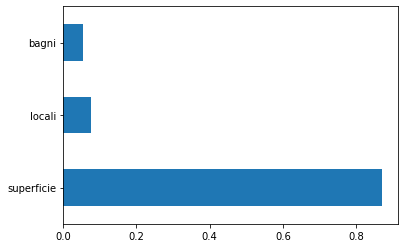

In [51]:
%matplotlib inline

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

## FEATURE SELECTION WITH CORRELATION MATRIX AND HEATMAP
Correlation matrix is used to show how much features are correlated to each other

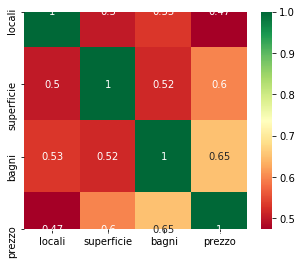

In [73]:
#get correlations
correlation_mtx = data.corr()
top_correlated_feat = correlation_mtx.index
plt.figure(figsize=(5, 4))
#plot heat map
g = sns.heatmap(data[top_correlated_feat].corr(), annot=True, cmap="RdYlGn")